In [5]:
import RPi.GPIO as GPIO
from IPython.display import display, clear_output
import IPython
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import time

# Sensor pins
line_pin_right = 19
line_pin_middle = 16
line_pin_left = 20

# Enable interactive mode for Jupyter Notebook
%matplotlib widget

RuntimeError: 'widget is not a recognised GUI loop or backend name

In [ ]:
# Initialize GPIO
def setup():
    GPIO.setwarnings(False)
    GPIO.setmode(GPIO.BCM)
    GPIO.setup(line_pin_right, GPIO.IN)
    GPIO.setup(line_pin_middle, GPIO.IN)
    GPIO.setup(line_pin_left, GPIO.IN)

# Define state values based on sensor readings
def get_sensor_value():
    status_right = GPIO.input(line_pin_right)
    status_middle = GPIO.input(line_pin_middle)
    status_left = GPIO.input(line_pin_left)

    # Determine the state value based on sensor readings
    if status_left == 1 and status_middle == 1 and status_right == 1:
        return 0  # All On
    elif status_left == 0 and status_middle == 1 and status_right == 1:
        return 1  # Left Off, Middle On, Right On
    elif status_left == 0 and status_middle == 0 and status_right == 1:
        return 2  # Left Off, Middle Off, Right On
    elif status_left == 1 and status_middle == 1 and status_right == 0:
        return -1  # Left On, Middle On, Right Off
    elif status_left == 1 and status_middle == 0 and status_right == 0:
        return -2  # Left On, Middle Off, Right Off
    elif status_left == 0 and status_middle == 0 and status_right == 0:
        return -3  # All Off
    else:
        return -3  # Undefined state


In [ ]:
'''
while True:
    print("Loop iteration")
    stats = get_sensor_value()
    time.sleep(1)  # Pause for 1 second  
    print(stats)
'''

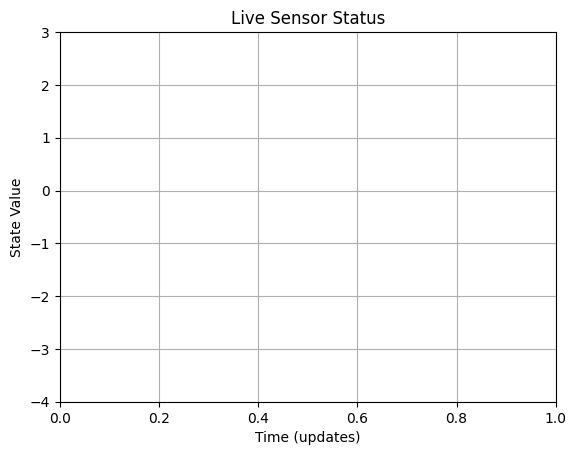

In [7]:

# Setup GPIO
setup()

# Initialize the plot
fig, ax = plt.subplots()
ax.set_ylim(-4, 3)
ax.set_title("Live Sensor Status")
ax.set_ylabel("State Value")
ax.set_xlabel("Time (updates)")
ax.grid(True)

state_values = []
time_values = []

# Update function for animation
def update(frame):
    sensor_value = get_sensor_value()
    if sensor_value is not None:
        state_values.append(sensor_value)
        time_values.append(len(state_values))

        # Clear the plot and plot the updated values
        ax.clear()
        ax.plot(time_values, state_values, label="Sensor State", color="blue")
        ax.set_ylim(-4, 4)
        ax.set_title("Live Sensor Status")
        ax.set_ylabel("State Value")
        ax.set_xlabel("Time (updates)")
        ax.grid(True)
        ax.legend(loc="upper right")

        # Keep only the latest 50 values for readability
        if len(state_values) > 50:
            state_values.pop(0)
            time_values.pop(0)

# Create the animation and store it in a variable
anim = FuncAnimation(fig, update, interval=500, cache_frame_data=False)

plt.show()

